Observations and Insights 
1. From the summary data, Ramicane and Capomulin have lower mean and standard deviation than all the other drug regimens. They are more effective and stable.
2. From the bar plot, Zoniferol has the lowest number of results. It means mouse taking this drug regimen have the highest death rate comparing to the other drug regimens.
3. From the scatter plot and linear regression analysis, there is a strong positive correlation between mouse weight and average tumor volume for Capomulin treatment.

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [15]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [16]:
# Combine the data into a single dataset
combined_data=pd.merge(mouse_metadata,study_results,on="Mouse ID",how="outer")
#combined_data.to_csv("data/combined data.csv")
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [17]:
# Check the data for duplicate mice and remove any data associated with that mouse ID.
# Create a dataframe which only keeps the Mouse ID once. In this case, the length of each column represents the total number of mice.
new_combined=combined_data[~combined_data.duplicated(subset=["Mouse ID"])]
new_combined.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0


In [18]:
# Checking the number of mice in the DataFrame.
number_of_mouse=len(new_combined["Mouse ID"])
number_of_mouse

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Create a new column which concatentates Mouse ID and Timepoint for each result. This column will be unique to each result.
# If the result duplicates with another, they should have the same "Mouse ID & Timepoint".
# To concatente Mouse ID and timepoint, the timepoint should be converted to str first.
df=combined_data
df['Timepoint'] = df['Timepoint'].astype(str)
df["Mouse ID & Timepoint"]=df["Mouse ID"].str.cat(df["Timepoint"],sep=" ")
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Mouse ID & Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,k403 0
1,k403,Ramicane,Male,21,16,5,38.825898,0,k403 5
2,k403,Ramicane,Male,21,16,10,35.014271,1,k403 10
3,k403,Ramicane,Male,21,16,15,34.223992,1,k403 15
4,k403,Ramicane,Male,21,16,20,32.997729,1,k403 20


In [20]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_bool=df.duplicated(subset=["Mouse ID & Timepoint"],keep="first")
duplicate_df=df.loc[duplicate_bool==True]
duplicate_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Mouse ID & Timepoint
909,g989,Propriva,Female,21,26,0,45.000000,0,g989 0
911,g989,Propriva,Female,21,26,5,47.570392,0,g989 5
913,g989,Propriva,Female,21,26,10,49.880528,0,g989 10
915,g989,Propriva,Female,21,26,15,53.442020,0,g989 15
917,g989,Propriva,Female,21,26,20,54.657650,1,g989 20


In [21]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Remove the duplicate results by column "Mouse ID & Timepoint"
cleaned_df=df[~df.duplicated(subset=["Mouse ID & Timepoint"])]
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Mouse ID & Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,k403 0
1,k403,Ramicane,Male,21,16,5,38.825898,0,k403 5
2,k403,Ramicane,Male,21,16,10,35.014271,1,k403 10
3,k403,Ramicane,Male,21,16,15,34.223992,1,k403 15
4,k403,Ramicane,Male,21,16,20,32.997729,1,k403 20
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,z969 25
1889,z969,Naftisol,Male,9,30,30,65.841013,3,z969 30
1890,z969,Naftisol,Male,9,30,35,69.176246,4,z969 35
1891,z969,Naftisol,Male,9,30,40,70.314904,4,z969 40


In [22]:
# Checking the number of mice in the clean DataFrame.
new_cleaned_df=cleaned_df[~cleaned_df.duplicated(subset=["Mouse ID"])]
len(new_cleaned_df["Mouse ID"])

249

In [23]:
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Mouse ID & Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,k403 0
1,k403,Ramicane,Male,21,16,5,38.825898,0,k403 5
2,k403,Ramicane,Male,21,16,10,35.014271,1,k403 10
3,k403,Ramicane,Male,21,16,15,34.223992,1,k403 15
4,k403,Ramicane,Male,21,16,20,32.997729,1,k403 20


## Summary Statistics

In [110]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straightforward, creating multiple series and putting them all together at the end.
Regimen=cleaned_df["Drug Regimen"].unique()
mean=[]
median=[]
variance=[]
std=[]
sem=[]
for drug in Regimen:
    mean.append(cleaned_df.loc[cleaned_df["Drug Regimen"]==drug,"Tumor Volume (mm3)"].mean())
    median.append(cleaned_df.loc[cleaned_df["Drug Regimen"]==drug,"Tumor Volume (mm3)"].median())
    variance.append(cleaned_df.loc[cleaned_df["Drug Regimen"]==drug,"Tumor Volume (mm3)"].var())
    std.append(cleaned_df.loc[cleaned_df["Drug Regimen"]==drug,"Tumor Volume (mm3)"].std())
    sem.append(cleaned_df.loc[cleaned_df["Drug Regimen"]==drug,"Tumor Volume (mm3)"].sem())
summary=pd.DataFrame({"Drug Regimen":Regimen,"Mean":mean,"Median":median,"Variance":variance,"Standard Deviation":std,"SEM":sem})
summary.set_index("Drug Regimen",inplace=True)
summary=summary.style.format({"Mean":"{:,.4f}".format,"Median":"{:,.4f}".format,"Variance":"{:,.4f}".format,"Standard Deviation":"{:,.4f}".format,"SEM":"{:,.4f}".format})
summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Ramicane,40.2167,40.6732,23.4867,4.8463,0.3210
Capomulin,40.6757,41.5578,24.9478,4.9948,0.3293
Infubinol,52.8848,51.8206,43.1287,6.5672,0.4922
Placebo,54.0336,52.2889,61.1681,7.8210,0.5813
Ceftamin,52.5912,51.7762,39.2902,6.2682,0.4698
Stelasyn,54.2331,52.4317,59.4506,7.7104,0.5731
Zoniferol,53.2365,51.8185,48.5334,6.9666,0.5164
Ketapril,55.2356,53.6987,68.5536,8.2797,0.6039
Propriva,52.3935,50.9100,43.1388,6.5680,0.5259


In [111]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function.
grouped_df=cleaned_df.groupby(["Drug Regimen"])
mean=grouped_df["Tumor Volume (mm3)"].mean()
summary_df=pd.DataFrame({"Mean":mean})
summary_df["Median"]=grouped_df["Tumor Volume (mm3)"].median()
summary_df["Variance"]=grouped_df["Tumor Volume (mm3)"].var()
summary_df["Standard Deviation"]=grouped_df["Tumor Volume (mm3)"].std()
summary_df["SEM"]=grouped_df["Tumor Volume (mm3)"].sem()
summary_df=summary_df.style.format({"Mean":"{:,.4f}".format,"Median":"{:,.4f}".format,"Variance":"{:,.4f}".format,"Standard Deviation":"{:,.4f}".format,"SEM":"{:,.4f}".format})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.6757,41.5578,24.9478,4.9948,0.3293
Ceftamin,52.5912,51.7762,39.2902,6.2682,0.4698
Infubinol,52.8848,51.8206,43.1287,6.5672,0.4922
Ketapril,55.2356,53.6987,68.5536,8.2797,0.6039
Naftisol,54.3316,52.5093,66.1735,8.1347,0.5965
Placebo,54.0336,52.2889,61.1681,7.8210,0.5813
Propriva,52.3935,50.9100,43.1388,6.5680,0.5259
Ramicane,40.2167,40.6732,23.4867,4.8463,0.3210
Stelasyn,54.2331,52.4317,59.4506,7.7104,0.5731


## Bar Plots

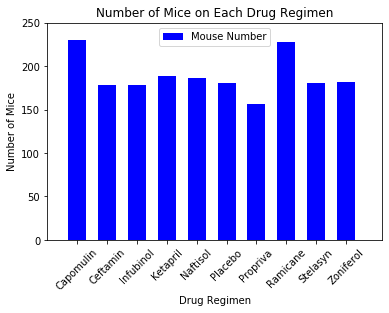

In [26]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
df2=cleaned_df.groupby(["Drug Regimen"])
bar_plot=df2["Mouse ID"].count()
bar_chart=bar_plot.plot(kind="bar",color="blue",width=0.6,rot=45)
bar_chart.set_xlabel("Drug Regimen")
bar_chart.set_ylabel("Number of Mice")
bar_chart.set_title("Number of Mice on Each Drug Regimen")
bar_chart.set_xlim(-1,len(Regimen)+0.2)
bar_chart.set_ylim(0,max(bar_plot)+20)
bar_chart.legend(["Mouse Number"],loc="upper center")
bar_chart

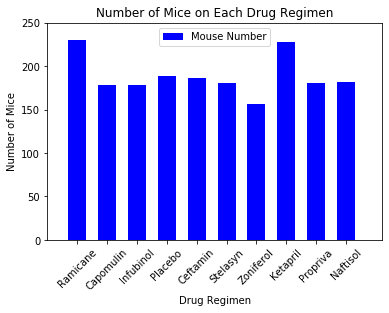

In [27]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
x_axis=Regimen
y_axis=[]
for drug in sorted(Regimen):
    y_axis.append(bar_plot[drug])
plt.bar(x_axis,y_axis,color="blue",align="center",width=0.6)
plt.xticks(rotation=45)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice on Each Drug Regimen")
plt.xlim(-1,len(Regimen)+0.2)
plt.ylim(0,max(bar_plot)+20)
plt.legend(["Mouse Number"],loc="upper center")
plt.show()

## Pie Plots

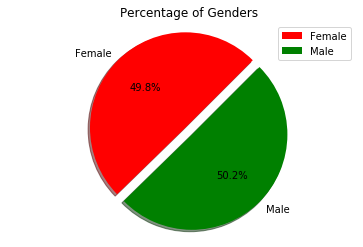

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df=new_combined[["Mouse ID","Sex"]]
pie=gender_df.groupby("Sex").count()
pie.rename(columns={"Mouse ID":" "},inplace=True)
explode=[0.1,0]
colors=["red","green"]
pie_chart=pie.plot(kind="pie",y=" ",shadow=True,startangle=45,autopct="%1.1f%%",explode=explode,colors=colors)
pie_chart.axis("equal")
pie_chart.set_title("Percentage of Genders")
pie_chart

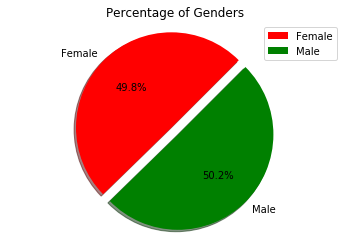

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_df=new_combined[["Mouse ID","Sex"]]
pie=gender_df.groupby("Sex").count()
labels=["Female","Male"]
size=[pie.loc["Female","Mouse ID"],pie.loc["Male","Mouse ID"]]
colors=["red","green"]
explode=[0.1,0]
plt.pie(size,labels=labels,colors=colors,explode=explode,shadow=True,startangle=45,autopct="%1.1f%%")
plt.axis("equal")
plt.title("Percentage of Genders")
plt.legend()
plt.show()

## Quartiles, Outliers and Boxplots

In [35]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Clean the data frame for the last time point of each mice.
modified_data=cleaned_df
modified_data["Timepoint"]=modified_data["Timepoint"].astype(float)
modified_data=modified_data.sort_values("Timepoint",ascending=False)
last_timepoint=modified_data[~modified_data.duplicated(subset=["Mouse ID"])]
last_timepoint

C:\Users\Feng\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Mouse ID & Timepoint
1892,z969,Naftisol,Male,9,30,45.0,73.867845,4,z969 45
834,f345,Infubinol,Male,23,26,45.0,60.918767,1,f345 45
962,i635,Propriva,Male,21,26,45.0,58.633404,3,i635 45
134,r554,Capomulin,Female,8,17,45.0,32.377357,3,r554 45
930,h246,Ketapril,Male,13,30,45.0,74.104086,2,h246 45
...,...,...,...,...,...,...,...,...,...
752,d133,Zoniferol,Male,5,30,0.0,45.000000,0,d133 0
594,b447,Ceftamin,Male,2,30,0.0,45.000000,0,b447 0
1551,t573,Ceftamin,Female,15,27,0.0,45.000000,0,t573 0
851,f932,Ketapril,Male,15,29,0.0,45.000000,0,f932 0


In [87]:
# Quartiles and IQR for Capomulin
capomulin=last_timepoint.loc[last_timepoint["Drug Regimen"]=="Capomulin",:]
capomulin_quartiles=capomulin["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
capomulin_IQR=capomulin_quartiles[0.75]-capomulin_quartiles[0.25]
capomulin_lower_bound=capomulin_quartiles[0.25]-1.5*capomulin_IQR
capomulin_upper_bound=capomulin_quartiles[0.75]+1.5*capomulin_IQR
count1=0
for i in range(len(capomulin["Mouse ID"])):
    if (capomulin.iloc[i,6]>capomulin_upper_bound) | (capomulin.iloc[i,6]<capomulin_lower_bound):
        count1+=1
print("The quartiles for Capomulin are:")
print(capomulin_quartiles)
print(f"The IQR for Capomulin is: {round(capomulin_IQR,2)}.")
print(f"The upper bound for Capomulin is {round(capomulin_upper_bound,2)}, and the lower bound for Capomulin is {round(capomulin_lower_bound,2)}.")
print(f"There are {count1} outliers for Capomulin treatment regimen.")

The quartiles for Capomulin are:
0.25    32.377357
0.50    38.125164
0.75    40.159220
Name: Tumor Volume (mm3), dtype: float64
The IQR for Capomulin is: 7.78.
The upper bound for Capomulin is 51.83, and the lower bound for Capomulin is 20.7.
There are 0 outliers for Capomulin treatment regimen.


In [82]:
# Quartiles and IQR for Ramicane
ramicane=last_timepoint.loc[last_timepoint["Drug Regimen"]=="Ramicane",:]
ramicane_quartiles=ramicane["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
ramicane_IQR=ramicane_quartiles[0.75]-ramicane_quartiles[0.25]
ramicane_lower_bound=ramicane_quartiles[0.25]-1.5*ramicane_IQR
ramicane_upper_bound=ramicane_quartiles[0.75]+1.5*ramicane_IQR
count2=0
for i in range(len(ramicane["Mouse ID"])):
    if (ramicane.iloc[i,6]>ramicane_upper_bound) | (ramicane.iloc[i,6]<ramicane_lower_bound):
        count2+=1
print("The quartiles for Ramicane are:")
print(ramicane_quartiles)
print(f"The IQR for Ramicane is: {round(ramicane_IQR,2)}.")
print(f"The upper bound for Ramicane is {round(ramicane_upper_bound,2)}, and the lower bound for Ramicane is {round(ramicane_lower_bound,2)}.")
print(f"There are {count2} outliers for Ramicane treatment regimen.")

The quartiles for Ramicane are:
0.25    31.560470
0.50    36.561652
0.75    40.659006
Name: Tumor Volume (mm3), dtype: float64
The IQR for Ramicane is: 9.1.
The upper bound for Ramicane is 54.31, and the lower bound for Ramicane is 17.91.
There are 0 outliers for Ramicane treatment regimen.


In [83]:
# Quartiles and IQR for Infubinol
infubinol=last_timepoint.loc[last_timepoint["Drug Regimen"]=="Infubinol",:]
infubinol_quartiles=infubinol["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
infubinol_IQR=infubinol_quartiles[0.75]-infubinol_quartiles[0.25]
infubinol_lower_bound=infubinol_quartiles[0.25]-1.5*infubinol_IQR
infubinol_upper_bound=infubinol_quartiles[0.75]+1.5*infubinol_IQR
count3=0
for i in range(len(infubinol["Mouse ID"])):
    if (infubinol.iloc[i,6]>infubinol_upper_bound) | (infubinol.iloc[i,6]<infubinol_lower_bound):
        count3+=1
print("The quartiles for Infubinol are:")
print(infubinol_quartiles)
print(f"The IQR for Infubinol is: {round(infubinol_IQR,2)}.")
print(f"The upper bound for Infubinol is {round(infubinol_upper_bound,2)}, and the lower bound for Infubinol is {round(infubinol_lower_bound,2)}.")
print(f"There are {count3} outliers for Infubinol treatment regimen.")

The quartiles for Infubinol are:
0.25    54.048608
0.50    60.165180
0.75    65.525743
Name: Tumor Volume (mm3), dtype: float64
The IQR for Infubinol is: 11.48.
The upper bound for Infubinol is 82.74, and the lower bound for Infubinol is 36.83.
There are 1 outliers for Infubinol treatment regimen.


In [84]:
# Quartiles and IQR for Ceftamin
ceftamin=last_timepoint.loc[last_timepoint["Drug Regimen"]=="Ceftamin",:]
ceftamin_quartiles=ceftamin["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
ceftamin_IQR=ceftamin_quartiles[0.75]-ceftamin_quartiles[0.25]
ceftamin_lower_bound=ceftamin_quartiles[0.25]-1.5*ceftamin_IQR
ceftamin_upper_bound=ceftamin_quartiles[0.75]+1.5*ceftamin_IQR
count4=0
for i in range(len(ceftamin["Mouse ID"])):
    if (ceftamin.iloc[i,6]>ceftamin_upper_bound) | (ceftamin.iloc[i,6]<ceftamin_lower_bound):
        count4+=1
print("The quartiles for Ceftamin are:")
print(ceftamin_quartiles)
print(f"The IQR for Ceftamin is: {round(ceftamin_IQR,2)}.")
print(f"The upper bound for Ceftamin is {round(ceftamin_upper_bound,2)}, and the lower bound for Ceftamin is {round(ceftamin_lower_bound,2)}.")
print(f"There are {count4} outliers for Ceftamin treatment regimen.")

The quartiles for Ceftamin are:
0.25    48.722078
0.50    59.851956
0.75    64.299830
Name: Tumor Volume (mm3), dtype: float64
The IQR for Ceftamin is: 15.58.
The upper bound for Ceftamin is 87.67, and the lower bound for Ceftamin is 25.36.
There are 0 outliers for Ceftamin treatment regimen.


In [103]:
# An alternative method of solving quartiles, IQR and outliers is to define a function.
def outliers(drug):
    drug_df=last_timepoint.loc[last_timepoint["Drug Regimen"]==drug,:]
    drug_quartiles=drug_df["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
    drug_IQR=drug_quartiles[0.75]-drug_quartiles[0.25]
    drug_lower_bound=drug_quartiles[0.25]-1.5*drug_IQR
    drug_upper_bound=drug_quartiles[0.75]+1.5*drug_IQR
    outliers_count=0
    outliers_ID=[]
    outliers_volume=[]
    for i in range(len(drug_df["Mouse ID"])):
        if (drug_df.iloc[i,6]>drug_upper_bound) | (drug_df.iloc[i,6]<drug_lower_bound):
            outliers_count+=1
            outliers_ID.append(drug_df.iloc[i,0])
            outliers_volume.append(drug_df.iloc[i,6])
    print(f"The quartiles for {drug} are:")
    print(drug_quartiles)
    print(f"The IQR for {drug} is: {round(drug_IQR,2)}.")
    print(f"The upper bound for {drug} is {round(drug_upper_bound,2)}, and the lower bound for {drug} is {round(drug_lower_bound,2)}.")
    print(f"There are {outliers_count} outliers for {drug} treatment regimen.")
    if outliers_count>0:
        for j in range(outliers_count):
            print(f"The outlier ID: {outliers_ID[j]}, the outlier volume: {outliers_volume[j]}")

In [98]:
# Then apply the function above four times. The results below should be matching with the previous method.
outliers("Capomulin")

The quartiles for Capomulin are:
0.25    32.377357
0.50    38.125164
0.75    40.159220
Name: Tumor Volume (mm3), dtype: float64
The IQR for Capomulin is: 7.78.
The upper bound for Capomulin is 51.83, and the lower bound for Capomulin is 20.7.
There are 0 outliers for Capomulin treatment regimen.


In [99]:
outliers("Ramicane")

The quartiles for Ramicane are:
0.25    31.560470
0.50    36.561652
0.75    40.659006
Name: Tumor Volume (mm3), dtype: float64
The IQR for Ramicane is: 9.1.
The upper bound for Ramicane is 54.31, and the lower bound for Ramicane is 17.91.
There are 0 outliers for Ramicane treatment regimen.


In [104]:
outliers("Infubinol")

The quartiles for Infubinol are:
0.25    54.048608
0.50    60.165180
0.75    65.525743
Name: Tumor Volume (mm3), dtype: float64
The IQR for Infubinol is: 11.48.
The upper bound for Infubinol is 82.74, and the lower bound for Infubinol is 36.83.
There are 1 outliers for Infubinol treatment regimen.
The outlier ID: c326, the outlier volume: 36.321345799999996


In [105]:
outliers("Ceftamin")

The quartiles for Ceftamin are:
0.25    48.722078
0.50    59.851956
0.75    64.299830
Name: Tumor Volume (mm3), dtype: float64
The IQR for Ceftamin is: 15.58.
The upper bound for Ceftamin is 87.67, and the lower bound for Ceftamin is 25.36.
There are 0 outliers for Ceftamin treatment regimen.


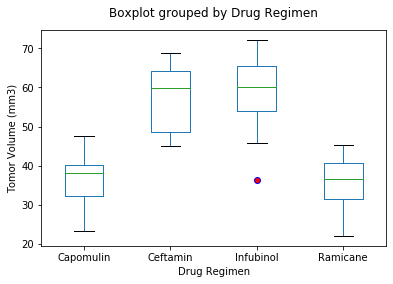

In [106]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Using pandas to generate box plot
four_drug_data=last_timepoint.loc[(last_timepoint["Drug Regimen"]=="Capomulin")|(last_timepoint["Drug Regimen"]=="Ramicane")|(last_timepoint["Drug Regimen"]=="Infubinol")|(last_timepoint["Drug Regimen"]=="Ceftamin"),:]
red_warning = dict(markerfacecolor="r",markeredgecolor="b", marker="o")
box=four_drug_data.boxplot(column='Tumor Volume (mm3)', by='Drug Regimen',flierprops=red_warning)
box.set_ylabel("Tomor Volume (mm3)")
box.set_title("")
box.grid(False)
box

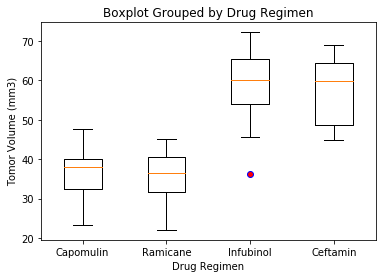

In [86]:
# Box plot by Matplotlib
fig1,ax1=plt.subplots()
data=[capomulin["Tumor Volume (mm3)"],ramicane["Tumor Volume (mm3)"],infubinol["Tumor Volume (mm3)"],ceftamin["Tumor Volume (mm3)"]]
red_warning = dict(markerfacecolor="r",markeredgecolor="b", marker="o")
ax1.boxplot(data,flierprops=red_warning)
ax1.set_title("Boxplot Grouped by Drug Regimen")
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel("Tomor Volume (mm3)")
tick_locations=[1,2,3,4]
plt.xticks(tick_locations,["Capomulin","Ramicane","Infubinol","Ceftamin"])
plt.show()

## Line and Scatter Plots

In [64]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
ID=input("Please input a Mouse ID which was treated with Capomulin. ")

Please input a Mouse ID which was treated with Capomulin. r944


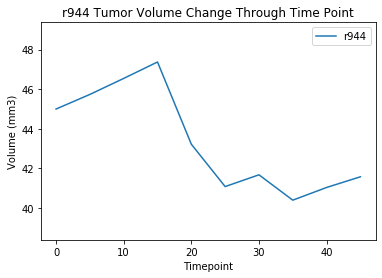

In [119]:
mice_info=cleaned_df.loc[cleaned_df["Mouse ID"]==ID,:]
x_axis=mice_info["Timepoint"]
y_axis=mice_info["Tumor Volume (mm3)"]
plt.plot(x_axis,y_axis)
plt.xlabel("Timepoint")
plt.ylabel("Volume (mm3)")
plt.title(f"{ID} Tumor Volume Change Through Time Point")
plt.ylim(min(y_axis)-2,max(y_axis)+2)
plt.legend([ID],loc="best")
plt.show()

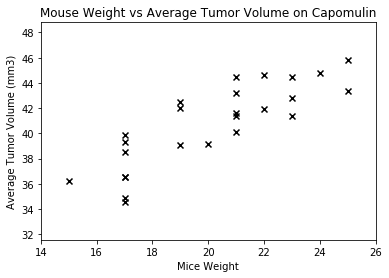

In [66]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_data=cleaned_df.loc[cleaned_df["Drug Regimen"]=="Capomulin",:]
capomulin_grouped=capomulin_data.groupby(["Mouse ID"])
average_volume=capomulin_grouped["Tumor Volume (mm3)"].mean()
weight=new_combined[["Mouse ID","Weight (g)"]]
average_volume=average_volume.reset_index()
merged_data=pd.merge(weight,average_volume,on="Mouse ID")
mouse_weight=merged_data["Weight (g)"]
mouse_tumor=merged_data["Tumor Volume (mm3)"]
plt.scatter(mouse_weight,mouse_tumor,marker="x",facecolors="black")
plt.xlabel("Mice Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlim(min(mouse_weight)-1,max(mouse_weight)+1)
plt.ylim(min(mouse_tumor)-3,max(mouse_tumor)+3)
plt.title("Mouse Weight vs Average Tumor Volume on Capomulin")
plt.show()

## Correlation and Regression

In [74]:
# Calculate the correlation coefficient and linear regression model
# for mouse weight and average tumor volume for the Capomulin regimen
correlation=st.pearsonr(mouse_weight,mouse_tumor)
print(f"The correlation coefficient between mouse weight and average tumor volume euqals to {round(correlation[0],2)}.")
slope,intercept,rvalue,pvalue,stderr=st.linregress(mouse_weight,mouse_tumor)
print(f"The linear regression model between mouse weight (x) and average tumor volume (y) is: y={round(slope,2)}x+{round(intercept,2)}.")

The correlation coefficient between mouse weight and average tumor volume euqals to 0.84.
The linear regression model between mouse weight (x) and average tumor volume (y) is: y=0.95x+21.55.


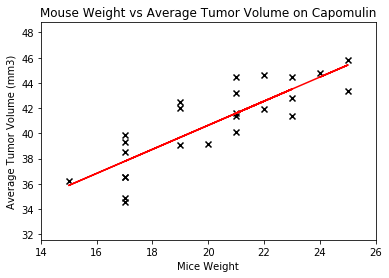

In [73]:
# Generate the scatter plot and the linear regression line
mouse_weight=merged_data["Weight (g)"]
mouse_tumor=merged_data["Tumor Volume (mm3)"]
plt.scatter(mouse_weight,mouse_tumor,marker="x",facecolors="black")
regression_values=slope*mouse_weight+intercept
plt.plot(mouse_weight,regression_values,"r")
plt.xlabel("Mice Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlim(min(mouse_weight)-1,max(mouse_weight)+1)
plt.ylim(min(mouse_tumor)-3,max(mouse_tumor)+3)
plt.title("Mouse Weight vs Average Tumor Volume on Capomulin")
plt.show()